# Rootfinding, Newton's Method, and Dynamical Systems

In the Continued Fractions unit, we met with the sequence
\begin{equation}
	1, \frac{3}{2}, \frac{17}{12}, \frac{577}{408}, \frac{665857}{470832}, \ldots
\end{equation}
which was generated by $x_{n+1} = \frac12{\left(x_{n} + \frac{2}{x_n}\right)}$; in words, the average of the number and two divided by the number. This unit explores where that sequence came from, and its relationship to $\sqrt{2}$. We'll approach this algebraically, as Newton did. Consider the equation
\begin{equation}
	x^2 - 2 = 0.
\end{equation}
Clearly the solutions to this equation are $x = \sqrt{2}$ and $x = -\sqrt{2}$. Let us _shift the origin_ by putting $x = 1 + s$; so $s = 0$ corresponds to $x = 1$. 

We draw the vertical part of the new axis that we will shift to, in red. Notice that we use the labels and tickmarks from the old axis, in black.

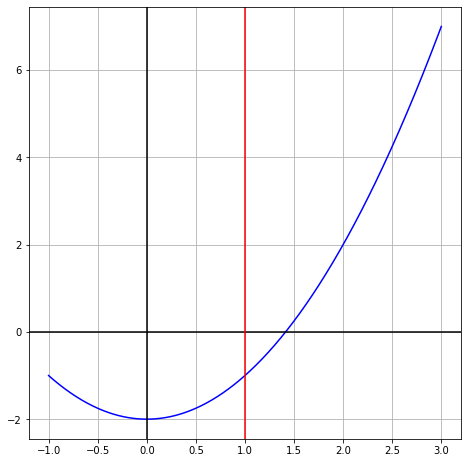

In [1]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])
n = 501
x = np.linspace(-1,3,n)
y = x*x-2;

plt.plot(x,y,'b')   # x^2-2 is in blue
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axvline(x=1, color='r') # The new axis is in red
plt.show()

Then
\begin{equation}
	\left(1 + s\right)^2 - 2 = 1 + 2s + s^2 - 2 = -1 + 2s + s^2 = 0.
\end{equation}
we now make the surprising assumption that $s$ is so small that we may ignore $s^2$ in comparison to $2s$. If it turned out that $s = 10^{-6}$, then $s^2 = 10^{-12}$, very much smaller than $2s = 2\cdot10^{-6}$; so there are small numbers $s$ for which this is true; but we don't know that this is true, here. We just hope.

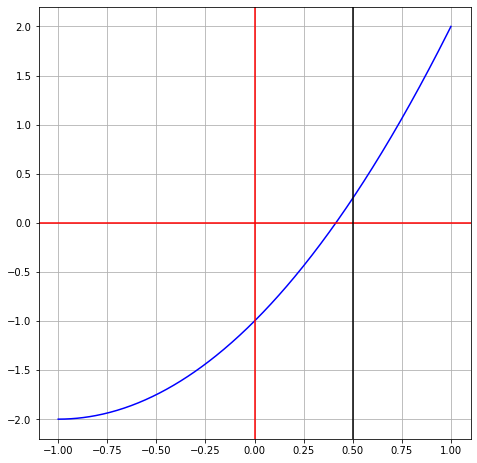

In [2]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])
n = 501
s = np.linspace(-1,1,n)
y = -1+2*s+s*s;  # Newton would have written s^2 as s*s, too

plt.plot(s,y,'b')   # equation in blue again
ax.grid(True, which='both')
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')
ax.axvline(x=1/2, color='k') # The new axis is in black
plt.show()

Then if $s^2$ can be ignored, our equation becomes
\begin{equation}
	-1 + 2s = 0
\end{equation}
or $s = \frac{1}{2}$. This means $x = 1 + s = 1 + \frac{1}{2} = \frac{3}{2}$.

We now repeat the process: shift the origin to $\frac{3}{2}$, not $1$: put now
\begin{equation}
	x = \frac{3}{2} +t
\end{equation}
which is equivalent to $s = 1/2 + t$, so
\begin{equation}
	\left(\frac{3}{2} + t\right)^2 = \frac{9}{4} + 3t + t^2 - 2 = \frac{1}{4} + 3t + t^2 = 0.
\end{equation}

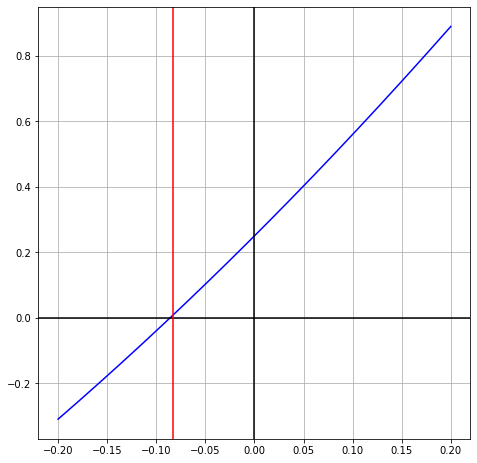

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])
n = 501
t = np.linspace(-0.2,0.2,n)
y = 1/4+3*t+t*t;  # Newton would have written t^2 as t*t, too

plt.plot(t,y,'b')   # equation in blue again
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axvline(x=-1/12, color='r') # The new axis will be red again
plt.show()

This gives $3t + t^2 + \frac{1}{4} = 0$ and again we ignore $t^2$ and hope it's smaller than $3t$. This gives
\begin{equation}
	3t + \frac{1}{4} = 0
\end{equation}
or $t = -\frac{1}{12}$. This means $x = \frac{3}{2} - \frac{1}{12}$ or $x = \frac{17}{12}$. Now we see the process. 

Again, shift the origin: $x = \frac{17}{12} + u$. Now
\begin{equation}
	\left(\dfrac{17}{12} + u\right)^2 = \dfrac{289}{144} + \dfrac{17}{6}u + u^2 - 2 = 0.
\end{equation}
Ignoring $u^2$,
\begin{equation}
	\dfrac{17}{6}u + \dfrac{1}{144} = 0
\end{equation}
or
\begin{equation}
	u = \dfrac{-6}{17\cdot144} = \dfrac{-1}{17\cdot24} = \dfrac{-1}{408}.
\end{equation}
Thus,
\begin{equation}
	x = \dfrac{17}{12} - \dfrac{1}{408} = \dfrac{577}{408}.
\end{equation}
As we saw in the Continued Fractions unit, these are the exact square roots of numbers ever more close to 2. For instance,
\begin{equation}
	\dfrac{577}{408} = \sqrt{2 + \dfrac{1}{408^2}}.
\end{equation}

## Euler again

It was Euler who took Newton's "shift the origin" strategy and made a general method&mdash;which we call Newton's method&mdash;out of it. In modern notation, Euler considered solving $f(x) = 0$ for a differentiable function $f(x)$, and used the tangent line approximation near an initial approximation $x_0$: if $x = x_0 + s$ then, using $f'(x_0)$ to denote the slope at $x_0$, $0 = f(x) = f(x_0 + s) \approx f(x_0) + f'(x_0)s$ ignoring terms of order $s^2$ or higher. Then
\begin{equation}
	s = -\dfrac{f(x_0)}{f'(x_0)}
\end{equation}
so
\begin{equation}
	x \approx x_0 + s = x - \dfrac{f(x_0)}{f'(x_0)}.
\end{equation}
The fundamental idea of Newton's method is that, if it worked once, we can do it again: pass the parcel! Put

$$
\begin{align}
	x_1 &= x_0 - \dfrac{f(x_0)}{f'(x_0)} \\
	x_2 &= x_1 - \dfrac{f(x_1)}{f'(x_1)} \\
	x_3 &= x_2 - \dfrac{f(x_2)}{f'(x_2)}
\end{align}
$$

and keep going, until $f(x_k)$ is so small that you're happy to stop.

Notice that each $x_k$ solves
\begin{equation}
	f(x) - f(x_k) = 0
\end{equation}
not $f(x) = 0$. But if $f(x_k)$ is really small, you've solved "almost as good" an equation, like finding $\sqrt{2 + \frac{1}{408^2}}$ instead of $\sqrt{2}$. So where did $\frac12{\left(x_n + \frac{2}{x_n}\right)}$ come from?
\begin{equation}
	x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)} = x_n - \dfrac{\left(x_n^2 - 2\right)}{2x_n}
\end{equation}
because if $f(x) = x^2 - 2$, $f'(x) = 2x - 0 = 2x$. Therefore,

$$
\begin{align}
	x_{n+1} &= x_n - \dfrac{\left(x_n^2 - 2\right)}{2x_n} \\
    &= \dfrac{2x_n^2 - x_n^2 + 2}{2x_n} \\
	&= \dfrac{x_n^2 + 2}{2x_n} \\
    &= \dfrac{1}{2}\left(x_n + \dfrac{2}{x_n}\right)
\end{align}
$$

as claimed. (For more complicated functions one _shouldn't_ simplify. But for $x^2 - a$, it's okay.)

Executing this process in decimals, using a calculator (our handy HP48G+ again), with $x_0 = 1$, we get

$$
\begin{align}
	x_0 &= 1 \nonumber \\
	x_1 &= \underline{1}.5 \nonumber \\
	x_2 &= \underline{1.4}1666\ldots \nonumber \\
	x_3 &= \underline{1.41421}568628 \nonumber \\
	x_4 &= \underline{1.41421356238} \nonumber \\
	x_5 &= x_4 \text{ to all 11 places in the calculator}
\end{align}
$$

Now $\sqrt{2} = 1.41421356237$ on this calculator. We see (approximately) 1, 2, 5 then 10 correct digits. The convergence behaviour is clearer in the continued fraction representation:
\begin{equation}
	1, 1 + \left[2\right], 1 + \left[2, 2, 2\right], 1 + \left[2, 2, 2, 2, 2, 2, 2 \right],
	1 + \left[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2\right]
\end{equation}

with 0, 1, 3, 7, 15 twos in the fraction part: each time doubling the previous plus 1, giving $2^0 - 1$, $2^1 - 1$, $2^2 - 1$, $2^3 - 1$, $2^4 - 1$ correct entries. This "almost doubling the number of correct digits with each iteration" is quite characteristic of Newton's method.

## Newton's Method

In the [Continued Fractions](continued-fractions.ipynb) unit, we saw Newton's method to extract square roots: $x_{n+1} = (x_n + a/x_n)/2$. That is, we simply took the average of our previous approximation with the result of dividing our approximation into what we wanted to extract the square root of.  We saw rapid convergence, in that the number of correct entries in the continued fraction for $\sqrt{a}$ roughly doubled with each iteration.  This simple iteration comes from a more general technique for finding zeros of nonlinear equations, such as $f(x) = x^5 + 3x + 2 = 0$. As we saw above, for general $f(x)$, Newton's method is
\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}\>,
\end{equation}
where the notation $f'(x_n)$ means the _derivative_ of $f(x)$ evaluated at $x=x_n$.  In the special case $f(x) = x^2-a$, whose roots are $\pm \sqrt{a}$, the general Newton iteration above reduces to the simple formula we used before, because $f'(x) = 2x$.

### Derivatives
We're not assuming that you know so much calculus that you can take derivatives of general functions, although if you do, great.  We _could_ show a Python method to get the computer to do it, and we might (or we might leave it for the Activities; it's kind of fun).  But we do assume that you know that derivatives of polynomials are easy: for instance, if $f(x) = x^3$ then $f'(x) = 3x^2$, and similarly if $f(x) = x^n$ for some integer $n$ then $f'(x) = n x^{n-1}$ (which holds true even if $n$ is zero or a negative integer---or, for that matter, if $n$ is any constant).  Then by the _linearity_ of the derivative, we can compute the derivative of a polynomial expressed in the monomial basis.  For instance, if $f(x) = x^5 + 3x + 2$ then $f'(x) = 5x^4 + 3$. It turns out that the Python implementation of polynomials knows how to do this as well (technically, polynomials _know how to differentiate themselves_), as we will see.  For this example we can use this known derivative in the Newton formula to get the iteration
\begin{equation}
x_{n+1} = x_n - \frac{x^5 + 3x + 2}{5x^4+3}\>.
\end{equation}

(RootfindingActivity-1)=

```{admonition} Rootfinding Activity 1
:class: tip
Write Newton's method iterations for the following functions, and estimate the desired root(s).
1. $f(x) = x^2 - 3$ with $x_0 = 1$
2. $f(x) = x^3 - 2$ with $x_0 = 1$
3. Newton's original example, $f(x) = x^3 - 2x - 5 = 0$. Since $f(0) = -5$, $f(1) = -6$, $f(2) = -1$, and $f(3) = 16$, we see there is a root between $x=2$ and $x=3$.  Use that knowledge to choose your initial estimate. 
{ref}`[What happened when we did this] <RootfindingActivityReport-1>`
```

(RootfindingActivity-2)=

```{admonition} Rootfinding Activity 1
:class: tip

__The Railway Pranksters Problem__

Late one night, some pranksters weld a $2$cm piece of steel into a train track $2$km long, sealing the gaps meant to allow for heat expansion.  In the morning as the temperature rises, the train track expands and bows up into a perfectly circular arc. How high is the arc in the middle?
{ref}`[How we found the height] <RootfindingActivityReport-2>`
```

### A more serious application

[Kepler's equation](https://en.wikipedia.org/wiki/Kepler's_equation) is
\begin{equation}
M = E - e\sin E
\end{equation}
where the _mean anomaly_ $M = n(t-t_0)$ where $t$ is time, $t_0$ is the starting time, $n = 2\pi/T$ is the sweep speed for a circular orbit with period $T$, and the _eccentricity_ $e$ of the (elliptical) orbit are all known, and one wants to compute the _eccentric anomaly_ $E$ by solving that nonlinear equation for $E$.  Since we typically want to do this for a succession of times $t$, initial estimates are usually handy to the purpose (just use the $E$ from the previous instant of time), and typically only one Newton correction is needed.

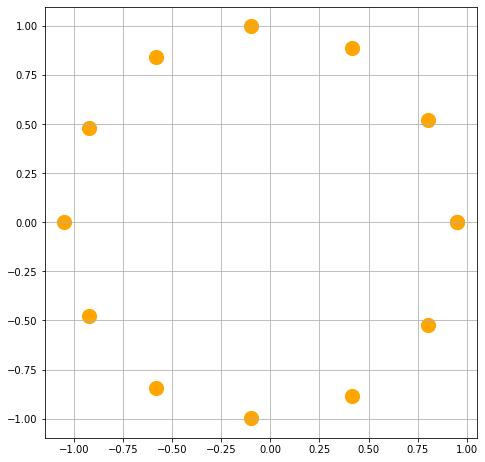

In [6]:
T = 1 # Period of one Jupiter year, say (equal to 11.8618 earth years)
n = 2*np.pi/T
# At t=t_0, which we may as well take to be zero, M=0 and so E = 0 as well.
nsamples = 12 # Let's take 13 sample positions including 0.
e = 0.0487 # Jupiter has a slightly eccentric orbit; not really visible to the eye here
E = [0.0] 
f = lambda ee: ee-e*np.sin(ee)-M
df = lambda ee: 1 - e*np.cos(ee) 
newtonmax = 5
for k in range(nsamples):
    M = n*(k+1)/nsamples # measuring time in Jupiter years
    EE = E[k]
    newtoniters = 0
    for j in range(newtonmax):
        residual = f(EE);
        if abs(residual) <= 1.0e-12:
            break
        EE = EE - residual/df(EE)
    E.append(EE)

x = [np.cos(ee)-e for ee in E]
y = [np.sqrt(1-e*e)*np.sin(ee) for ee in E]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x,y,s=200,color='orange')  
ax.set_aspect('equal')
ax.grid(True, which='both')
plt.show()

### A useful interpretation

When we were looking at square roots, we noticed that each iteration (say $17/12$) could be considered the _exact_ square root of something near to what we wanted to extract the root of; this kind of interpretation is possible for general functions as well.  Each iterate $x_n$, when we are trying to solve $f(x) = 0$, can be considered to be the _exact_ zero of $g(x) = f(x)-r_n$, where $r_n = f(x_n)$ is the so-called _residual_.  The equation is so simple that it's slippery: $x_n$ solves $f(x) - f(x_n) = 0$.  Of course it does.  No matter what you put in for $x_n$, so long as $f(x)$ was defined there, you would have a zero.  The key of course is the question of whether or not the residual is small enough to ignore.  There are two issues with that idea.

1. The function $f(x)$ might be sensitive to changes (think of $f(x) = (x-\pi)^2$, for instance; adding just a bit to it makes both roots complex, and the change is quite sudden).  
2. The change might not make sense in the physical/chemical/biological context in which $f(x)$ arose.

This second question is not mathematical in nature: it depends on the context of the problem.  Nevertheless, as we saw for the square roots, this is _often_ a very useful look at our computations.

To answer the question of sensitivity, we need calculus, and the general notion of derivative:

$f(x)+s = 0$ makes some kind of change to the zero of $f(x)=0$, say $x=r$.  If the new root is $x=r+t$ where $t$ is tiny (just like $s$ is small) then calculus says $0 = f(r+t) + s = f(r)+f'(r)t+s + O(t^2)$ where we have used the tangent-line approximation (which is, in fact, where Newton iteration comes from).  Solving for this we have that $t = -s/f'(r)$, because of course $f(r)=0$.  

This is nothing more (or less!) than the calculus derivation of Newton's method, but that's not what we are using it for here.  We are using it to _estimate_ the sensitivity of the root to changes in the function.  We see that if $f'(r)$ is small, then $t$ will be much larger than $s$; in this case we say that the zero of $f(x)$ is _sensitive_.  If $f'(r)=0$ we are kind of out of luck with Newton's method, as it is; it needs to be fixed up.

### Things that can go wrong

Newton's method is a workhorse of science, there's no question.  There are multidimensional versions, approximate versions, faster versions, slower versions, applications to just about everything, especially optimization.  But it is not a perfect method.  Solving nonlinear equations is _hard_. Here are some kinds of things that can go wrong.

1. The method can converge to the wrong root.  If there's more than one root, then this can happen.
2. The method can divide by zero (if you happen to hit a place where the derivative is zero).  Even just with $f(x)=x^2-2$ this can happen if you choose your initial guess as $x_0 = 0$. (See if you can either find other $x_0$ that would lead to zero, or else prove it couldn't happen for this function).
3. If the derivative is _small_ but not zero the convergence can be very, very slow.  This is related to the sensitivity issue.
4. You might get caught in a _cycle_ (see the animated GIF as the header of this chapter).  That is, like with the game of pass the parcel with the Gauss map, we may eventually hit the initial point we started with.  
5. The iteration may take a very long time to settle down before converging.
6. The iteration may go off to infinity.

Let's take Cleve Moler's "perverse example", from section 4.3 of [Numerical Computing with Matlab](https://www.mathworks.com/moler/chapters.html), namely

\begin{align}
   f(x) &= \sqrt{x-r} \mathrm{\ if\ } x \ge r \nonumber\\
        &= -\sqrt{r-x} \mathrm{\ if\ } x \le r
\end{align}

We will draw this in the next cell, for some harmless $r$.  This peculiar function was chosen so that _every_ initial estimate (that wasn't exactly right, i.e. $x=r$) would create a two-cycle:  pretty mean.

Let's check.  The derivative is

\begin{align}
   f(x) &= \frac12\left(x-r\right)^{-1/2} \mathrm{\ if\ } x > r \nonumber\\
        &= -\frac12\left(r-x\right)^{-1/2} \mathrm{\ if\ } x < r
\end{align}

So the Newton iteration is, if $x_n > r$,
\begin{equation}
x_{n+1} = x_n - \frac{ (x_n-r)^{1/2} }{ (x_n-r)^{-1/2}/2 } = x_n - 2(x_n-r) = 2r - x_n
\end{equation}
which can be rewritten to be $x_{n+1}-r = r -x_n$, so the distance to $r$ is exactly the same but now we are on the other side. If instead $x_n < r$,
\begin{equation}
x_{n+1} = x_n - \frac{ -(r-x_n)^{1/2} }{ +(r-x_n)^{-1/2}/2 } = x_n + 2(r-x_n) = 2r - x_n
\end{equation}
which again says $x_{n+1}-r = r -x_n$.

In particular, take $x_0 = 0$.  Then $x_1 = 2r$.  Then $x_2 = 0$ again. 

Obviously this example was contrived to show peculiar behaviour; but these things really can happen.


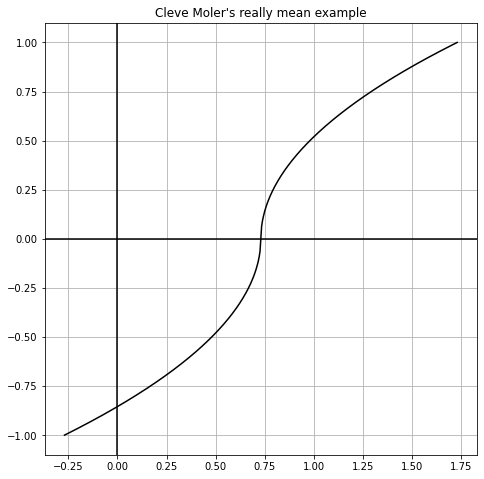

In [7]:
r = 0.73  # Some more or less random number
n = 501
x = np.linspace(-1+r,1+r,n)
y = np.sign(x-r)*np.sqrt(np.abs(x-r))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])

plt.plot(x,y,'k')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("Cleve Moler's really mean example")
plt.show()

(RootfindingActivity-3)=

```{admonition} Rootfinding Activity 3
:class: tip
Take a few moments and _write down some questions about Newton's method or rootfinding in general_.  Do not worry about answers, just now.
{ref}`[Some of the questions we thought of] <RootfindingActivityReport-3>`
```

## A _Really Useful_ trick to find initial guesses

One of our "generic good questions" was "can you find an easier question to solve?" and "does answering that easier question help you to to solve this one?"  This gives an amazing method, called _continuation_ or _homotopy continuation_ for solving many equations, such as polynomial equations.  The trick is easily stated.  Suppose you want to solve $H(x) = 0$ (H for "Hard") and you have no idea where the roots are.  You might instead be able to solve $E(x) = 0$, a similar equation but one you know the roots of already (E for "Easy", of course).  Then consider blending them: $F(x,t) = (1-t)E(x) + tH(x)$ for some parameter $t$, which we take to be a real number between $0$ and $1$.

You start by solving the Easy problem, at $t=0$, because $F(x,0) = E(x)$.  Then increase $t$ a little bit, say to $t=0.1$; use the roots of $E(x)$ as your initial estimate of the roots of $F(x,0.1) = 0.9E(x) + 0.1H(x)$.  If it works, great; increase $t$ again, and use those recently-computed roots of $F(x,0.1)$ as the initial estimates for (say) $F(x,0.2)$.  Continue on until either the method breaks down (it can, the root paths can cross, which is annoying, or go off to infinity, which is worse) or you reach the end.

As an example, suppose you want to solve $h(x) = x e^x - 2.0 = 0$.  (This isn't a very hard problem at all, but it's a nice example).  If we were trying to solve $e(x) = e^x - 2.0 = 0$, then we already know the answer: $x=\ln(2.0) = 0.69314718056\ldots$. So $f(x,t) = (1-t)(e^x - 2) + t(xe^x -2) = (1-t+tx)e^x - 2 = (1+t(x-1))e^x - 2$.  Newton's method for this is straightforward (this is the first non-polynomial function we've used, but we bet that you know that the derivative of $e^x$ is $e^x$, and that you know the product rule as well).  So our iteration is (for a fixed $t$)

\begin{equation}
x_{n+1} = x_n - \frac{ (1+t(x_n-1))e^{x_n} - 2 }{(1-t+t(x_n+1))e^{x_n}}
\end{equation}


In [8]:
nt = 10
newtonmax = 3
t = np.linspace(0,1,nt)
x = np.zeros(nt+1)
x[0] = np.log(2.0) # Like all snobs, Python insists on log rather than ln
for k in range(1,nt):
    xi = x[k-1]
    for i in range(newtonmax):
        y = np.exp(xi)
        ft = (1+t[k]*(xi-1))*y-2;
        dft = (1-t[k] + t[k]*(xi+1))*y
        xi = xi - ft/dft
    x[k] = xi
    
print( 'The solution is {} and the residual is {}'.format(xi, xi*np.exp(xi)-2.0) )

The solution is 0.8526055020137254 and the residual is -2.220446049250313e-16


In [9]:
from scipy import special
reference = special.lambertw(2.0)
print("The reference value is {}".format(reference))

The reference value is (0.8526055020137254+0j)


You can learn more about the [Lambert W function here](https://orcca.on.ca/LambertW/) or at the [Wikipedia link](https://en.wikipedia.org/wiki/Lambert_W_function). 

### The problem with multiple roots

Newton's iteration divides by $f'(x_n)$, and if the root $r$ we are trying to find happens to be a _multiple_ root, that is, both $f(r) = 0$ and $f'(r)=0$, then the $f'(x_n)$ we are dividing by will get smaller and smaller the closer we get to $r$. This slows Newton iteration to a crawl.  Consider $f(x) = W(x^3)$ where $W(s)$ is the [Lambert W function](https://orcca.on.ca/LambertW/).  Then since $W(0)=0$ we have $f'(x) = 3x^2 W'(x^3)$ so $f'(0)=0$ as well.  Let's look at how this slows us down.  Notice that $W(s)$ is itself _defined_ to be the root of the equation $y\exp(y)-s = 0$, and it itself is usually evaluated by an iterative method (in Maple, Halley's method is used because the derivatives are cheap).  But let's just let python evaluate it for us here. We can evaluate $W'(x)$ by implicit differentiation: $W(x)\exp W(x) = x$ so $W'(x)\exp W(x) + W(x) W'(x) \exp W(x) = 1$ and therefore $W'(x) = 1/(\exp W(x)(1+ W(x)))$.

In [10]:
f = lambda x: special.lambertw( x**3 )
df = lambda x: 3*x**2/(np.exp(f(x))*(1+ f(x)))
SirIsaac = lambda x: x - f(x)/df(x)
hex = [0.1] # We pretend that we don't know the root is 0
n = 10
for k in range(n):
    nxt = SirIsaac( hex[k] )
    hex.append(nxt)
print( hex )


[0.1, (0.0666333666167554+0j), (0.044415675138000696+0j), (0.02960915295524054+0j), (0.019739179108047577+0j), (0.013159402133893345+0j), (0.008772924760017682+0j), (0.005848614532183306+0j), (0.0038990759647654794+0j), (0.002599383899468682+0j), (0.001732922584427688+0j)]


We can see that the iterates are _decreasing_ but the turtle imitation is absurd.

There is an _almost useless_ trick to speed this up.  If we "just happen to know" the multiplicity $\mu$ of the root, then we can speed things up.  Here the multiplicity is $\mu=3$.  Then we can _modify_ Newton's iteration to speed it up, like so:
\begin{equation}
x_{n+1} = x_n - \mu\frac{f(x_n)}{f'(x_n)}
\end{equation}
Let's try it out.

In [11]:
mu = 3
ModSirIsaac = lambda x: x - mu*f(x)/df(x)
n = 3
hex = [0.2]
for k in range(n):
    nxt = ModSirIsaac( hex[k] )
    hex.append(nxt)
print( hex )

[0.2, (-0.0015873514490433727+0j), (-6.348810149478523e-12+0j), (8.077935669463161e-28+0j)]


So, it _does_ work; instead of hardly getting anywhere in ten iterations, it got the root in three.  __NB: The first time we tried this, we had a bug in our derivative and the iterates did not approach zero with the theoretical speed: so we deduced that there must have been a bug in the derivative, and indeed there was.__

But this trick is (as we said) almost useless; because if we don't know the root, how do we know its multiplicity?

### What happens if we get the derivative wrong?

Let's suppose that we get the derivative wrong&mdash;maybe deliberately, to save some computation, and we only use the original estimate $f'(x_0)$.  This can be useful in some circumstances.  In this case, we don't get such rapid approach to the zero, but we can get the iterates to approach the root, if not very fast.  Let's try.  Take $f(x) = x^2-2$, and our initial estimate $x_0 = 1$ so $f'(x_0) = 2$. This "approximate Newton" iteration then becomes
\begin{equation}
x_{n+1} = x_n - \frac{1}{2}f(x_n)
\end{equation}
or $x_{n+1} = x_n - (x_n^2-2)/2$.

In [12]:
n = 10
hex = [1.0]
f = lambda x: x*x-2
df = 2
quasi = lambda x: x - f(x)/df;
for k in range(n):
    nxt = quasi( hex[k] )
    hex.append(nxt)
print( hex )

[1.0, 1.5, 1.375, 1.4296875, 1.407684326171875, 1.4168967450968921, 1.4130985519638084, 1.4146747931827024, 1.4140224079494415, 1.4142927228578732, 1.4141807698935047]


We see that the iterates are getting closer to the root, but quite slowly.

To be honest, this happens more often when someone codes the derivative incorrectly than it does by deliberate choice to save the effort of computing the derivative.  It has to be one ridiculously costly derivative before this slow approach is considered worthwhile (it looks like we get about one more digit of accuracy after two iterations).

### What if there is more than one root?

A polynomial of degree $n$ has $n$ roots (some or all of which may be complex, and some of which may be multiple).  It turns out to be important in practice to solve polynomial equations.  John McNamee wrote a bibliography in the late nineties that had about _ten thousand_ entries in it&mdash;that is, the bibliography listed ten thousand published works on methods for the solution of polynomials. It was later published as a book, but would be best as a computer resource.  Unfortunately, we can't find this online anywhere now, which is a great pity.  But in any case ten thousand papers is a bit too much to expect anyone to digest.  So we will content ourselves with a short discussion.

First, Newton's method is not very satisfactory for solving polynomials.  It only finds one root at a time; you need to supply an initial estimate; and then you need to "deflate" each root as you find it, so you don't find it again by accident.  This turns out to introduce numerical instability (sometimes).  This all _can_ be done but it's not so simple.  We will see better methods in the Mandelbrot unit.

But we really don't have to do anything: we can use Maple's `fsolve`, which is robust and fast enough for most purposes. In Python, we can use the similarly-named routine `fsolve` from SciPy, if we only want one root: there are other facilities in NumPy for polynomial rootfinding, which we will meet in a later unit.

We do point out that the "World Champion" polynomial solver is a program called MPSolve, written by Dario Bini and Leonardo Robol.  It is freely available at [this GitHub link](https://github.com/robol/MPSolve). The paper describing it is [here](https://www.sciencedirect.com/science/article/pii/S037704271300232X).  

In [13]:
from scipy.optimize import fsolve
f = lambda x: x**2+x*np.exp(x)-2
oneroot = fsolve( f, 0.5 )
print( oneroot, oneroot**2 + oneroot*np.exp(oneroot)-2 )

[0.72048399] [-2.44249065e-15]


### Complex initial approximations, fractal boundaries, Julia sets, and chaos
Using Newton's method to extract square roots (when you have a calculator, or Google) is like growing your own wheat, grinding it to flour by hand, and then baking bread, when you live a block away from a good bakery. It's kind of fun, but faster to do it the modern way. But even for _cube_ roots, the story gets more interesting when complex numbers enter the picture.

Consider finding all $z$ with
\begin{equation}
	z^3 - 8 = 0 .
\end{equation}
The results are $z = 2$, $z = 2\cdot e^{\frac{i\cdot2\pi}{3}}$, and $z = 2\cdot e^{\frac{-i2\pi}{3}}$.

See our [Appendix on complex numbers](../Appendix/complex-numbers.ipynb).

## A look back at the programming constructs used in this unit

We are assuming that you did not start with this unit.  So, in addition to the things you saw in the previous unit(s), we mentioned new plotting features such as gridlines and other decorations.  We introduced `linspace` from `numpy` which is a very useful construct to get a vector of values equally spaced across an interval.  The name is taken from the Matlab command of the same name; it's not an intuitive name, but one gets used to it.  We introduced `lambda` functions, which are good for one-line programs or even anonymous programs.  The name comes from a philosophical approach to computing [by Alonzo Church](https://en.wikipedia.org/wiki/Lambda_calculus) that compares with Turing machines.  But for us it's just syntax.  

We saw the first use of colour in plots.  We saw the first "special" function, namely Lambert $W$.  This is implemented in `scipy`.  We saw complex numbers, and the `optimize` subpackage, and the solver `fsolve`.

## More Activities

(RootfindingActivity-4)=

```{admonition} Rootfinding Activity 4
:class: tip
Sometimes Newton iteration is "too expensive"; a cheaper alternative is the so-called _secant iteration_, which goes as follows: $z_{n+1} = z_n - f(z_n)(z_{n}-z_{n-1})/(f(z_n) - f(z_{n-1}))$. You need not one, but _two_ initial approximations for this.  Put $f(z) = z^2-2$ and start with the two initial approximations $z_0  = 1$, $z_1 = 3/2$.  Carry out several steps of this (in exact arithmetic is better).  Convert each rational $z_n$ to continued fraction form.  Discuss what you find.
{ref}`[What happened when we did this] <RootfindingActivityReport-4>`
```

(RootfindingActivity-5)=

```{admonition} Rootfinding Activity 5
:class: tip 
Try Newton and secant iteration on some functions of your own choosing.  You should see that Newton iteration usually takes fewer iterations to converge, but since it needs a derivative evaluation while the secant method does not, each iteration is "cheaper" in terms of computational cost (if $f(z)$ is at all expensive to evaluate, $f'(z)$ usually is too; there are exceptions, of course).  The consensus seems to be that the secant method is a bit more practical; but in some sense it is just a variation on Newton's method.
{ref}`[What happened when we did this] <RootfindingActivityReport-5>`
```

(RootfindingActivity-6)=

```{admonition} Rootfinding Activity 6
:class: tip
Both the Newton iteration and the secant iteration applied to $f(z) = z^2-a^2$ can be _solved analytically_ by the transformation $z = a\coth \theta$.  [Hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions)  The iteration $z_{n+1} = (z_n + a^2/z_n)/2$ becomes (you can check this) $\coth \theta_{n+1} = \cosh 2\theta_n/\sinh 2\theta_n = \coth 2\theta_n$, and so we may take $\theta_{n+1} = 2\theta_n$.  This can be solved to get $\theta_n = 2^n\theta_0$ and so we have an analytical formula for each $z_n = a \coth( 2^n \theta_0 )$.  Try this on $a^2=2$; you should find that $\theta_0 = \mathrm{invcoth}(1/\sqrt{2})$.  By "invcoth" we mean the functional inverse of coth, i.e.: $\coth\theta_0 = 1/\sqrt{2}$. It may surprise you that that number is complex.  Nevertheless, you will find that all subsequent iterates are real, and $\coth 2^n\theta_0$ goes to $1$ very quickly.
NB This was inadvertently difficult.  Neither numpy nor scipy has an invcoth (or arccoth) function. The Digital Library of Mathematical Functions says (equation 4.37.6) that arccoth(z) = arctanh(1/z).  Indeed we had to go to Maple to find out that invcoth$(1/\sqrt{2}) = \ln(1+\sqrt{2}) - i\pi/2$.
{ref}`[What happened when we did this] <RootfindingActivityReport-6`
```

(RootfindingActivity-7)=

```{admonition} Rootfinding Activity 7
:class: tip
Try the above with $a^2=-1$.  NB the initial estimate $z_0 = 1$ fails! Try $z_0 = e = \exp(1) = 2.71828...$ instead. For this, the $\theta_0 = 1j\arctan(e^{-1})$. Then you might enjoy reading Gil Strang's lovely article [A Chaotic Search for $i$](https://www.jstor.org/stable/2686733). 
{ref}`[What happened when we did this] <RootfindingActivityReport-7>`
```

(RootfindingActivity-8)=

```{admonition} Rootfinding Activity 8
:class: tip
Try to solve the _secant_ iteration for $z^2-a^2$ analytically.  You should eventually find a connection to Fibonacci numbers. 
{ref}`[What happened when we did this] <RootfindingActivityReport-8>`
```

(RootfindingActivity-9)=

```{admonition} Rootfinding Activity 9
:class: tip
People keep inventing new rootfinding iterations.  Usually they are reinventions of methods that others have invented before, such as so-called _Schroeder_ iteration and _Householder_ iteration.  One step along the way is the method known as _Halley iteration_, which looks like this: 
    \begin{equation*}
    z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n) - \frac{f(z_n)f''(z_n)}{2f'(z_n)}} 
    \end{equation*}
    which, as you can see, also involves the _second_ derivative of $f$.  When it works, it works quickly, typically converging in fewer iterations than Newton (although, typically, each step is more expensive computationally).  Try the method out on some examples.  It may help you to reuse your code (or Maple's code) if you are told that Newton iteration on $F(z) = f(z)/\sqrt{f'(z)}$ turns out to be identical to Halley iteration on $f(z)$. __NB: this trick helps you to "re-use" code, but it doesn't generate a particularly efficient iteration. In particular, the square roots muck up the formula for the derivatives, and simplification beforehand makes a big difference to program speed.  So if you want speed, you should program Halley's method directly.__
{ref}`[What happened when we did this] <RootfindingActivityReport-9>`
```

(RootfindingActivity-10)=

```{admonition} Rootfinding Activity 10
:class: tip
Try to solve Halley's iteration  for $x^2-a$ analytically.  Then you might enjoy reading [Revisiting Gilbert Strang's "A Chaotic Search for i"](https://doi.org/10.1145/3363520.3363521) by Ao Li and Rob Corless; Ao was a (graduate) student in the first iteration of this course at Western, and she solved&mdash;in class!&mdash;what was then an _open_ problem (this problem!).
{ref}`[What happened when we did this] <RootfindingActivityReport-10>`
```

(RootfindingActivity-11)=

```{admonition} Rootfinding Activity 11
:class: tip
Let's revisit Activity 6.  It turns out that we don't need to use hyperbolic functions. In the OEIS when searching for the numerators of our original sequence $1$, $3/2$, $17/12$ and so on, and also in the paper [What Newton Might Have Known](https://doi.org/10.1080/00029890.2021.1964274), we find the formulas $x_n = r_n/s_n$ where
    \begin{align*}
    r_n &= \frac{1}{2}\left( (1+\sqrt2)^{2^n} + (1-\sqrt2)^{2^n}\right) \\
    s_n &= \frac{1}{2\sqrt2}\left( (1+\sqrt2)^{2^n} - (1-\sqrt2)^{2^n}\right)
    \end{align*}
    Verify that this formula gives the same answers (when $a=2$) as the formula in question 4.  Try to generalize this formula for other integers $a$.  Discuss the growth of $r_n$ and $s_n$: it is termed _doubly exponential_. Show that the error $x_n - \sqrt2$ goes to zero like $1/(3+2\sqrt2)^{2^n}$.  How many iterations would you need to get ten thousand digits of accuracy? Do you need to calculate the $(1-\sqrt2)^{2^n}$ part?
{ref}`[Where you can find more discussion] <RootfindingActivityReport-11>`
```

(RootfindingActivity-12)=

```{admonition} Rootfinding Activity 12
:class: tip
Do any of the other results of [Revisiting Gilbert Strang's "A Chaotic Search for i"](https://doi.org/10.1145/3363520.3363521) on secant iteration, Halley's iteration, Householder iteration, and so on, translate to a form like that of Activity 11?  (We have not tried this ourselves yet).
{ref}`[Some thoughts] <RootfindingActivityReport-12>`
```

(RootfindingActivity-13)=

```{admonition} Rootfinding Activity 13
:class: tip
Solve the Schroeder iteration problem of the paper [Revisiting Gilbert Strang's "A Chaotic Search for i"](https://doi.org/10.1145/3363520.3363521).  This iteration generates the image of the "infinite number of infinity symbols" used in the Preamble, by the way.  We don't know how to solve this problem (we mean, analytically, the way Newton, Secant, Halley, and Householder iterations were solved).  We'd be interested in your solution.
{ref}`[We don't know how to do this] <RootfindingActivityReport-13>`
```

(RootfindingActivity-14)=

```{admonition} Rootfinding Activity 14
:class: tip
A farmer has a goat, a rope, a circular field, and a pole fixed firmly at the _edge_ of the field.  How much rope should the farmer allow so that the goat, tied to the pole, can eat the grass on exactly half the field? Discuss your assumptions a bit, and indicate how much precision in your solution is reasonable.
{ref}`[This is a classical puzzle, and recently someone became somewhat famous for "solving" it.  We find that to be puzzling.] <RootfindingActivityReport-14>`
```